In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

In [68]:
df = pd.read_csv("./bg_12_21.txt", sep="\t")
df.date = pd.to_datetime(df["date"])
df.night_date = pd.to_datetime(df["night_date"])

In [113]:
df

,median_sky_bg,median_norm_4px_color_1,angle_status,angle,date,median_moon_phase,median_moon_distance,night_date
0,2216.880,0.16315,INC,26,2012-04-23 08:55:18.500,0.071975,146.177473,2012-04-22
1,2183.070,0.16315,INC,27,2012-04-23 09:12:29.000,0.072380,146.363217,2012-04-22
2,2183.670,0.16315,DEC,27,2012-04-23 09:16:32.000,0.072470,146.406839,2012-04-22
3,2370.090,0.17536,INC,27,2012-05-18 07:41:33.500,0.916815,119.170915,2012-05-17
4,2374.855,0.17536,DEC,27,2012-05-18 07:47:37.000,0.916960,119.231020,2012-05-17
...,...,...,...,...,...,...,...,...
871,1750.040,0.19304,DEC,23,2021-09-07 02:46:46.500,0.010875,103.682897,2021-09-06
872,1682.600,0.19304,DEC,24,2021-09-07 02:33:40.000,0.010570,103.831183,2021-09-06
873,1673.320,0.19304,DEC,25,2021-09-07 02:19:31.000,0.010240,103.989443,2021-09-06
874,1937.780,0.17736,DEC,23,2021-09-27 01:32:21.000,0.686390,162.497499,2021-09-26


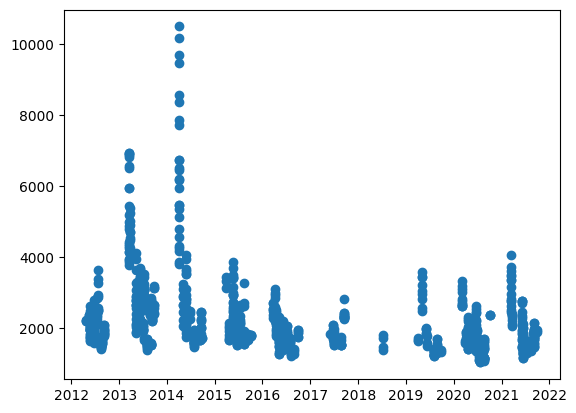

In [70]:
plt.scatter(df["date"], df["median_sky_bg"])

## 1. Whether looking into town has effect on sky background

In [71]:
# columns = ["date_only", "date", "median_sky_bg", "median_moon_phase", "median_moon_distance"]
def direction_influence(angle):
    inc = df[(df["angle_status"] == "INC") & (df["angle"] == angle)]
    dec = df[(df["angle_status"] == "DEC") & (df["angle"] == angle)]
    return dec.merge(inc, on="night_date", suffixes=("_dec", "_inc"))

In [72]:
# Whether sky background is different based on whether we're looking into town or away
for angle in [22, 23, 24, 25, 26, 27]:
    print("Angle", angle)
    print(direction_influence(angle)["median_sky_bg_dec"] / direction_influence(angle)["median_sky_bg_inc"])

Angle 22
Series([], dtype: float64)
Angle 23
0    0.902507
1    0.583319
2    0.747670
dtype: float64
Angle 24
0    0.938702
1    0.783939
2    0.769505
3    0.624718
4    0.761265
5    0.759597
dtype: float64
Angle 25
0    0.788529
1    0.967447
2    0.842185
3    0.727629
4    0.823435
5    0.651120
6    0.780099
7    0.787222
dtype: float64
Angle 26
0     0.944111
1     1.041059
2     0.873646
3     0.652240
4     1.029643
5     0.903149
6     0.771554
7     0.846540
8     0.884735
9     0.810465
10    0.986238
11    0.676784
12    0.818844
13    0.975970
14    0.864867
15    0.803576
16    0.843837
dtype: float64
Angle 27
0     1.000275
1     1.002010
2     0.994254
3     0.989664
4     1.116346
5     1.006496
6     0.995905
7     1.058794
8     1.000624
9     0.952097
10    0.983183
11    0.996579
12    1.001242
13    0.917004
14    0.756031
15    0.974411
16    0.835977
17    0.745778
18    0.988850
19    0.941889
20    0.931963
21    1.006416
22    0.972809
23    0.957694
24    

In [73]:
# It does look like whether we're looking town or away from town has a influence.
# We found this by comparing the sky ADU within a night at the same cluster angle
# into the town and away from town. We consistently see higher ADUs when looking
# into town

## 2. Whether the sky background has increased

In [45]:
# Since we have found that the sky background is different based on whether we're
# looking into town (INC cluster angle status) and away from the town (decreasing
# cluster angle status), let's check whether the SKY background in the town has
# increased.

In [96]:
df_inc = df[(df["angle_status"] == "INC")]
df_dec = df[(df["angle_status"] == "DEC")]

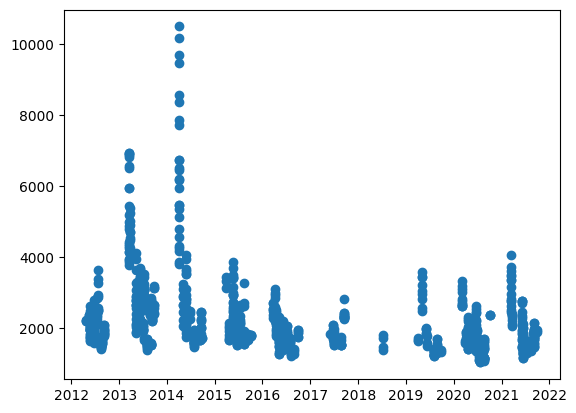

In [86]:
plt.scatter(df["date"], df["median_sky_bg"],)

In [115]:
px.scatter(df_inc, x="date", y="median_sky_bg", hover_data=["median_moon_distance", "median_moon_phase"])

array([[<Axes: title={'center': 'median_sky_bg'}>]], dtype=object)

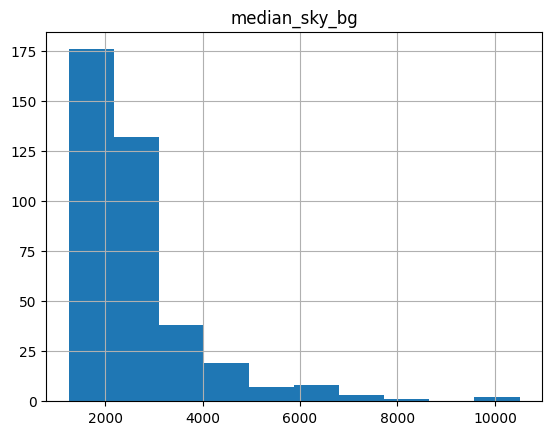

In [89]:
df_inc[["median_sky_bg"]].hist()

In [97]:
standard_dev_inc = df_inc[["night_date", "median_sky_bg"]].groupby("night_date").std()
standard_dev_dec = df_dec[["night_date", "median_sky_bg"]].groupby("night_date").std()

In [98]:
standard_dev_inc.describe()

,median_sky_bg
count,57.000000
mean,286.104162
std,277.492536
min,23.907280
25%,155.495466
50%,230.470892
75%,343.420485
max,1986.352734


In [99]:
standard_dev_dec.describe()

,median_sky_bg
count,91.000000
mean,129.857600
std,176.891286
min,0.738927
25%,45.187104
50%,69.226022
75%,133.045242
max,1047.866939


In [103]:
# Looking into town the sky ADU within the night has median standard 
# deviation of 230 ADUs while median standard deviation looking away
# from town is 69
# This probably suggests that it's the lights in town that drive it

In [114]:
px.scatter(df_dec, x="date", y="median_sky_bg", hover_data=["night_date"])